In [1]:
#importing libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast
# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()
 
# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [2]:
df = df[df['job_title_short'] == 'Data Analyst']

In [3]:
df_exploded = df.explode('job_skills')

In [38]:
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary= ('salary_year_avg', 'median') 
)

skills_no = 10
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skills_no)

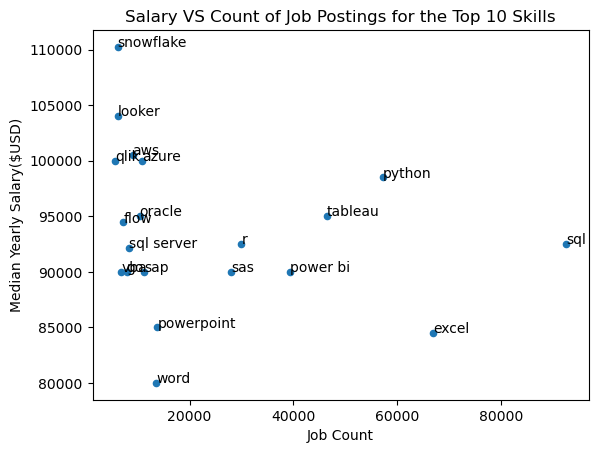

In [5]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('Salary VS Count of Job Postings for the Top 10 Skills')
plt.xlabel('Job Count')
plt.ylabel('Median Yearly Salary($USD)')
plt.tight_layout

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i], txt)
plt.show()

## ADVANCE CUSTOMIZATION

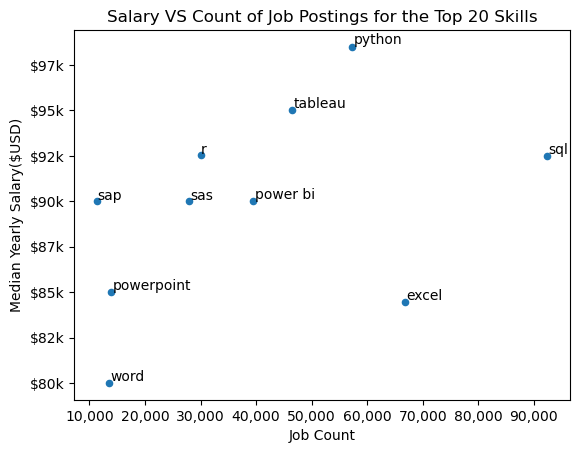

In [39]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

from adjustText import adjust_text


plt.title('Salary VS Count of Job Postings for the Top 20 Skills')
plt.xlabel('Job Count')
plt.ylabel('Median Yearly Salary($USD)')




texts = []

for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i], txt))



ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y , pos: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey', lw=1.5))
plt.tight_layout

plt.show()